## 정상성 검정 및 확인

### 정상성이란? 

- 정상성은 추세와 계절성을 갖지 않는 진동하는 데이터이다. 
- 주기성 행동을 가지고 있지만 주기가 특정 패턴을 갖지 않고 시계열을 관측하는 어떠한 시점에서도 똑같은 모양일 것이다..
- 그러므로 추세나 계절성이 없는 데이터 == > ARIMA 모형을 적용하기 위한 조건 
- 정상성을 띄지 않는다면 정상성(stationary)을 갖춘 형태로 변경해줘야 한다. 

### 정상성 검정

Augmented Dickey-Fuller Test

- 정상성을 알아보기 위한 단위근 검정 방법
- 귀무가설 : 데이터가 정상성(stationary)을 갖지 않는다. (변동이 있다.)
- 대립가설 : 데이터가 정상성(stationary)을 갖는다 


> adfuller(x, maxlag, regression, autolag)

* x: 시계열 자료<br>
* regression: 검정에 사용할 모형 <br> &emsp; &emsp; &emsp; &emsp; {'nc': 추세 없음, 'c':상수항만 사용, 'ct':상수항&1차 추세, 'ctt':상수항&2차 추세}

* autolag: 검정 AR 모형의 차수를 자동 결정하는 알고리즘  <br> &emsp; &emsp; &emsp; &emsp; {'AIC', 'BIC', 't-stat', None}

<br>

return 값 : <br>
-         0. 검정통계량
        1. p-value
        2. 사용된 시차의 수
        3. 분석에 사용한 자료 수
        4. 1%, 5%, 10% 수준에 해당되는 검정통계량 값

In [2]:
import pandas as pd

data = pd.read_csv('./data/arima_data.csv', names = ['day','price'])
data.head(3)

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
data['day'] = pd.to_datetime(data['day'],format = '%Y-%m-%d')
data.set_index('day', inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


In [7]:
train_len = int(len(data) * 0.8)
training = data[:train_len]
test = data.drop(training.index)

In [10]:
## 귀무가설 : 데이터가 정상성을 갖지 않는다(변동이 있다)
## 대립가설 : 데이터가 정상성을 가진다.

from statsmodels.tsa.stattools import adfuller

adf = adfuller(training, regression='ct')

print(f'ADF Statistic : {adf[0]}')
print(f'p-value : {adf[1]}')

ADF Statistic : -1.9997199341327796
p-value : 0.6015863303794179


단위근 검정에서 p-value가 0.05보다 크므로 정상성을 갖지 않는 것으로 판단됨 

<b>차분 후 단위근 검정 재실시</b>

차분 : 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산하는 것

In [11]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

<br>

### 시계열 데이터 정상성 만족시키기

데이터 프레임을 n차 차분하고 acf, pacf를 다시 구함

> DF.diff(periods=차분횟수).iloc[1:]

alpha : 신뢰구간 (파란색 구간의 폭으로 나타남)<br>
lags : 그래프의 X축 범위

<AxesSubplot:xlabel='day'>

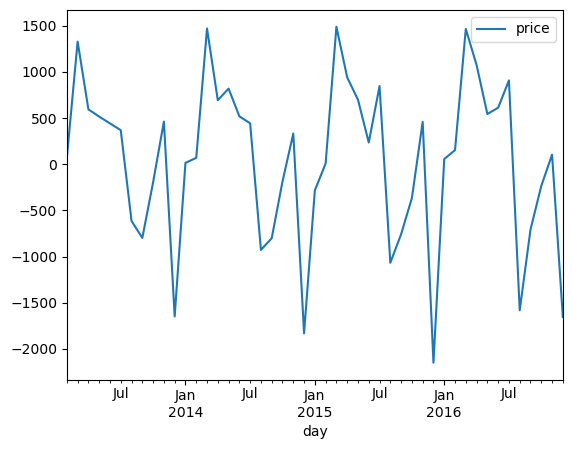

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()

diff_data.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_data)

print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')

ADF Statistic: -12.094547576926441
p-value: 2.085160639960858e-22
